# Business Understanding

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 200 countries worldwide.
In this business case, we are going to take a look at Rio de Janeiro Airbnb dataset and answer few questions about neighbourhood, such as:

    1. What is the Top 10 neighbourhood most expensive?
    2. What is the Top 10 neighbourhood most listed and which one is the most expensive?
    3. What is the Top 10 neighbourhood with better review rating?
    4. How are the listings distributed on Rio de Janeiro?


# Data Understanding

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps
import gmaps.datasets
%matplotlib inline

## Loading the Data

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,11,11,0,0,1.82
3,35636,https://www.airbnb.com/rooms/35636,20210222161029,2021-02-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.02
4,35764,https://www.airbnb.com/rooms/35764,20210222161029,2021-02-23,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26615 non-null  int64  
 1   listing_url                                   26615 non-null  object 
 2   scrape_id                                     26615 non-null  int64  
 3   last_scraped                                  26615 non-null  object 
 4   name                                          26586 non-null  object 
 5   description                                   25160 non-null  object 
 6   neighborhood_overview                         14314 non-null  object 
 7   picture_url                                   26615 non-null  object 
 8   host_id                                       26615 non-null  int64  
 9   host_url                                      26615 non-null 

In [4]:
df.shape

(26615, 74)

In [5]:
# droping column with NaN value
df.dropna(axis = 1, how = 'all', inplace = True)
df.shape

(26615, 70)

# Data Preparation

In [6]:
# Change the dtype from price column
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].apply(pd.to_numeric)

df['price'].describe()

count     26615.000000
mean        742.589254
std        5368.868834
min           0.000000
25%         157.000000
50%         280.000000
75%         550.000000
max      625216.000000
Name: price, dtype: float64

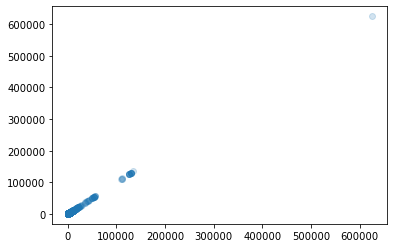

In [7]:
# Looking at price column column, we can see that we have a max value too high for the mean.
# Let's take a look how the price is distributed.
x = df['price']
y = df['price']
plt.scatter(x, y, alpha = 0.2)
plt.show()

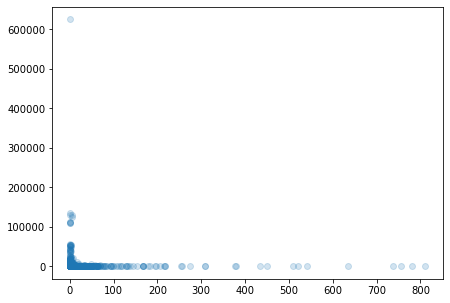

In [8]:
# Let's see how price value counts is distributed
from collections import Counter
df_1 = Counter(df['price'])
df_1 = pd.DataFrame.from_dict(df_1, orient='index').reset_index()
df_1 = df_1.rename(columns={'index':'price', 0:'count'})

x = df_1['count']
y = df_1['price']
plt.figure(figsize = (7, 5))
plt.scatter(x, y, alpha = 0.2)
plt.show()

In [9]:
# Therefore, we will drop all the rows that has price greater than 100,000.
new_df = df.drop(df[df['price'] > 100000].index)
new_df['price'].describe()

count    26596.000000
mean       635.407918
std       1944.437780
min          0.000000
25%        157.000000
50%        280.000000
75%        550.000000
max      55978.000000
Name: price, dtype: float64

# Data Analysis

## Question 1 - What is the Top 10 neighbourhood most expensive?

In [10]:
# Count values from neighbourhood cleansed column
count_nc = new_df['neighbourhood_cleansed'].value_counts()
count_nc.describe()

count     151.000000
mean      176.132450
std       719.927947
min         1.000000
25%         5.000000
50%        12.000000
75%        56.500000
max      7703.000000
Name: neighbourhood_cleansed, dtype: float64

In [11]:
# Creating dataframe for neighbourhood and their mean prices.
## We will consider only neighbourhoods that is listed over than 100.
## With that in mind, We will disconsider neighbourhoods that can possibly have a high mean price, 
## but we need to have a high amount of data for that neighbourhood to be considered.
df_2 = pd.DataFrame({"Neighbourhoods" : count_nc,
                   "Mean price" : new_df.groupby(['neighbourhood_cleansed'])['price'].mean()
                   })
df_2 = df_2.sort_values(by = ['Neighbourhoods'], ascending = False)
df_2 = df_2[df_2.Neighbourhoods >= 100]
df_2 = df_2.sort_values(by = ['Mean price'], ascending = False)
df_2 = df_2[:10]
df_2

,Neighbourhoods,Mean price
São Conrado,226,2435.853982
Itanhangá,137,1104.007299
Lagoa,261,1043.513410
Barra da Tijuca,2722,891.009552
Leblon,1165,853.823176
Vargem Pequena,117,828.350427
Gávea,194,827.500000
Recreio dos Bandeirantes,1179,748.118745
Jardim Botânico,204,713.563725
Taquara,119,707.252101


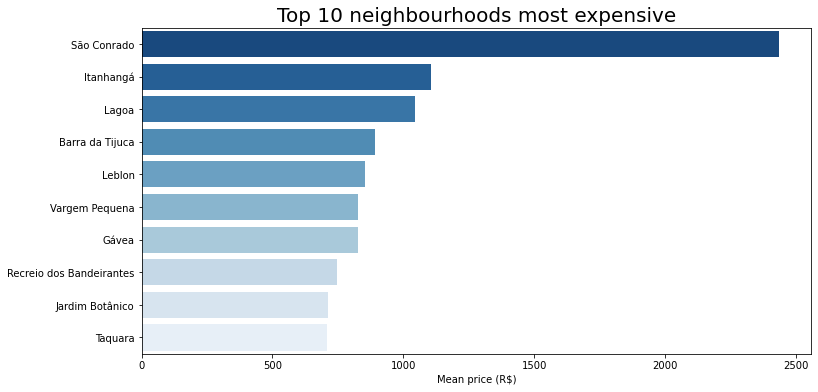

In [12]:
# Create the plot
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x = df_2['Mean price'] , y = df_2.index[:10], data = df_2, palette = 'Blues_r')
ax.set_xlabel('Mean price (R$)', weight='normal', size=10)
plt.title('Top 10 neighbourhoods most expensive', fontsize=20)
ax.tick_params('x', labelsize=10)
ax.tick_params('y', labelsize=10)
plt.show()

## Question 2 - What is the Top 10 neighbourhood most listed and which one is the most expensive?

In [13]:
# Creating Series for top 10 neighbourhoods most listed
count_nc.sort_values(ascending = False)[:10]

Copacabana                  7703
Barra da Tijuca             2722
Ipanema                     2571
Jacarepaguá                 1335
Botafogo                    1220
Recreio dos Bandeirantes    1179
Leblon                      1165
Santa Teresa                 881
Centro                       773
Flamengo                     612
Name: neighbourhood_cleansed, dtype: int64

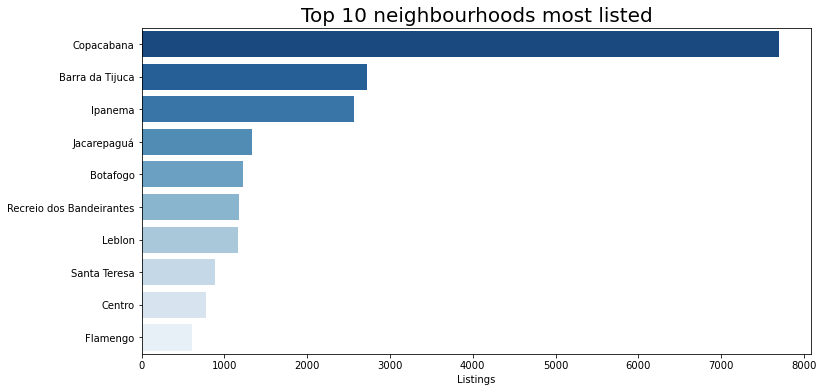

In [14]:
# Create the plot
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x = count_nc.values[:10], y = count_nc.index[:10],palette = 'Blues_r')
ax.set_xlabel('Listings', weight='normal', size=10)
plt.title('Top 10 neighbourhoods most listed', fontsize=20)
ax.tick_params('x', labelsize=10)
ax.tick_params('y', labelsize=10)
plt.show()

In [15]:
# Creating Dataframe for top 10 neighbourhoods most listed mean price
df_3 = pd.DataFrame({"Neighbourhoods" : count_nc,
                   "Mean price" : new_df.groupby(['neighbourhood_cleansed'])['price'].mean()
                   })

df_3 = df_3.sort_values(by = ['Neighbourhoods'], ascending = False)
df_3 = df_3[:10]
df_3 = df_3.sort_values(by = ['Mean price'], ascending = False)
df_3

,Neighbourhoods,Mean price
Barra da Tijuca,2722,891.009552
Leblon,1165,853.823176
Recreio dos Bandeirantes,1179,748.118745
Ipanema,2571,697.608713
Santa Teresa,881,661.775255
Jacarepaguá,1335,619.527341
Copacabana,7703,541.409711
Flamengo,612,385.697712
Botafogo,1220,375.119672
Centro,773,306.793014


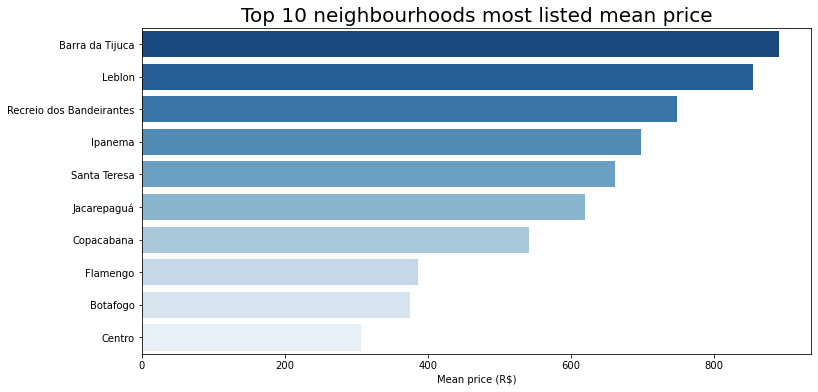

In [16]:
# Create the plot
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x = df_3['Mean price'] , y = df_3.index[:10], data = df_2, palette = 'Blues_r')
ax.set_xlabel('Mean price (R$)', weight='normal', size=10)
plt.title('Top 10 neighbourhoods most listed mean price', fontsize=20)
ax.tick_params('x', labelsize=10)
ax.tick_params('y', labelsize=10)
plt.show()

## Question 3 - What is the Top 10 neighbourhood with better review rating?

In [17]:
# understangin review scores rating column
new_df['review_scores_rating']

0        94.0
1        95.0
2        94.0
3        94.0
4        98.0
         ... 
26610     NaN
26611     NaN
26612     NaN
26613     NaN
26614     NaN
Name: review_scores_rating, Length: 26596, dtype: float64

In [18]:
# droping null value review scores rating column
new_df_2 = new_df.dropna(subset = ['review_scores_rating'])
new_df_2['review_scores_rating']

0         94.0
1         95.0
2         94.0
3         94.0
4         98.0
         ...  
26419    100.0
26427    100.0
26430    100.0
26442    100.0
26460    100.0
Name: review_scores_rating, Length: 16112, dtype: float64

In [19]:
# airbnb displays in their website different range for review scores rating. It works from 0 to 5.
# Therefore, we will create a new column that transforms review scores rating column to this range.
new_df_2['new_review_scores_rating'] = new_df_2['review_scores_rating']/20
print('Mean score: {}.'.format(new_df_2['new_review_scores_rating'].mean()))
print('Max score: {}.'.format(new_df_2['new_review_scores_rating'].max()))
print('Min score: {}.'.format(new_df_2['new_review_scores_rating'].min()))

Mean score: 4.728829443892736.
Max score: 5.0.
Min score: 1.0.


<ipython-input-19-f15bf61a32c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['new_review_scores_rating'] = new_df_2['review_scores_rating']/20


In [20]:
# Mean score for each neighbourhood
new_df_2.groupby(['neighbourhood_cleansed'])['new_review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Vista Alegre            5.000000
Sepetiba                5.000000
Bancários               5.000000
Cacuia                  5.000000
Campinho                5.000000
                          ...   
Pedra de Guaratiba      3.687500
Santíssimo              3.666667
Rocha                   3.462500
Piedade                 2.500000
Cidade Universitária    1.500000
Name: new_review_scores_rating, Length: 132, dtype: float64

In [21]:
new_df_2['number_of_reviews'].describe()

count    16112.000000
mean        20.017751
std         36.078536
min          1.000000
25%          2.000000
50%          6.000000
75%         20.000000
max        446.000000
Name: number_of_reviews, dtype: float64

In [22]:
# Creating dataframe for neighbourhood and their mean scores.
# We will consider only neighbourhoods that has 10 or more number of reviews and 100 or more lists.
new_df_3 = new_df_2.drop(new_df_2[new_df_2.number_of_reviews < 10].index)
new_df_3['number_of_reviews'].describe()

count    6426.000000
mean       45.110489
std        46.988419
min        10.000000
25%        15.000000
50%        27.000000
75%        56.000000
max       446.000000
Name: number_of_reviews, dtype: float64

In [23]:
rsr = new_df_3.groupby(['neighbourhood_cleansed'])['new_review_scores_rating'].mean().sort_values(ascending=False)
rsr

neighbourhood_cleansed
Inhaúma              5.0000
Todos os Santos      5.0000
Méier                5.0000
Magalhães Bastos     5.0000
Santíssimo           5.0000
                      ...  
Rio Comprido         4.6125
Santa Cruz           4.6000
Grajaú               4.6000
Engenho de Dentro    4.6000
Penha Circular       4.0000
Name: new_review_scores_rating, Length: 90, dtype: float64

In [24]:
# Creating Dataframe for top 10 neighbourhoods with higher review score
df_3 = pd.DataFrame({"Neighbourhoods" : count_nc,
                   "Review Score Rating" : new_df_3.groupby(['neighbourhood_cleansed'])['new_review_scores_rating'].mean()
                   })

df_3 = df_3.sort_values(by = ['Neighbourhoods'], ascending = False)
df_3 = df_3[:10]
df_3 = df_3.sort_values(by = ['Review Score Rating'], ascending = False)
df_3['Review Score Rating']

Jacarepaguá                 4.818905
Recreio dos Bandeirantes    4.810714
Centro                      4.796392
Leblon                      4.793973
Santa Teresa                4.793902
Botafogo                    4.788889
Barra da Tijuca             4.785614
Flamengo                    4.779930
Ipanema                     4.764286
Copacabana                  4.757005
Name: Review Score Rating, dtype: float64

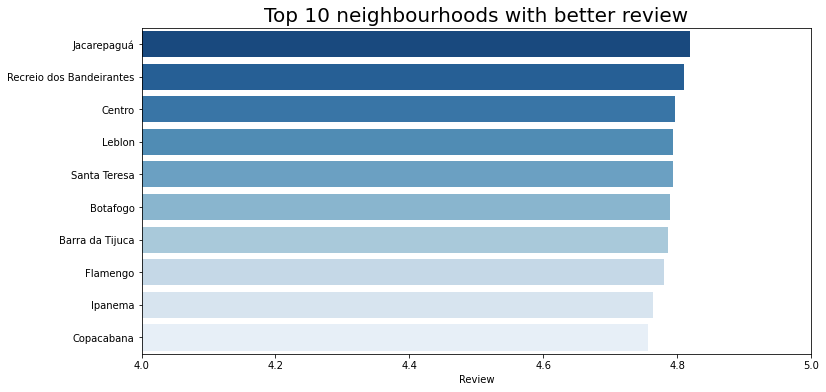

In [27]:
# Create the plot
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
ax = sns.barplot(x = df_3['Review Score Rating'] , y = df_3.index[:10], data = df_3, palette = 'Blues_r')
ax.set_xlabel('Review', weight='normal', size=10)
plt.title('Top 10 neighbourhoods with better review', fontsize=20)
ax.tick_params('x', labelsize=10)
ax.tick_params('y', labelsize=10)
ax.set(xlim=(4, 5))   
plt.show()

 ## Question 4 - How are the listings distributed on Rio de Janeiro?

In [26]:
gmaps.configure(api_key = '...') #insert your API Key.
locations = df[['latitude', 'longitude']]
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))